In [1]:
## Segment partners based on their payment behaviors

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Crusher Cleaned Data.xlsx')
data.head()

,Number,Partner Name,Bill Date,Due Date,Total Signed,Amount Due,Payment Status,Payment Date
0,FAC/2024/0002,National Concrete Products,2024-05-08,2024-05-08,918.0,0.0,Fully paid,May2024
1,FAC/2024/0001,National Concrete Products,2024-05-05,2024-05-05,612.0,36.0,Not fully paid,May2024
2,FAC/2023/0007,SOMTUNA,2023-11-11,2023-11-11,300.0,300.0,Not fully paid,November2023
3,FAC/2023/0006,COCC JV GCI,2023-05-28,2023-05-28,14080.0,0.0,Fully paid,May2023
4,FAC/2023/0003,"Mike' N Dad, Muhhamed Zaheer Warraich",2023-04-12,2023-04-12,2720.0,2720.0,Not fully paid,April2023


In [2]:
# Data preprocessing
data['Total Signed'] = pd.to_numeric(data['Total Signed'], errors='coerce')
data['Signed Amount Paid'] = data['Total Signed'] - pd.to_numeric(data['Amount Due'], errors='coerce')
data['Payment Ratio'] = data['Signed Amount Paid'] / data['Total Signed']

In [3]:
# Aggregating data by partner
partner_data = data.groupby('Partner Name').agg({
    'Total Signed': 'sum',
    'Signed Amount Paid': 'sum',
    'Payment Ratio': 'mean'
}).reset_index()

In [4]:
# Selecting features for clustering
features = partner_data[['Total Signed', 'Payment Ratio']]

# Normalizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
partner_data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

le n_clusters efficace est : 3
le score est :  -5.076865972460995


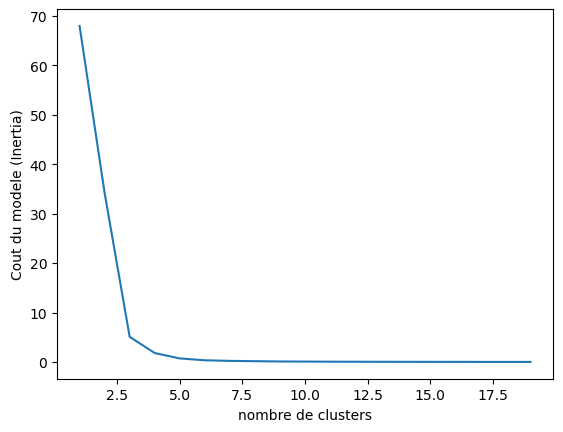

In [5]:
from kneed import KneeLocator
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k,n_init=10).fit(scaled_features)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
kl = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
print(f'le n_clusters efficace est : {kl.elbow}')
ScoreValue = kmeans.score(scaled_features)
print('le score est : ', ScoreValue)

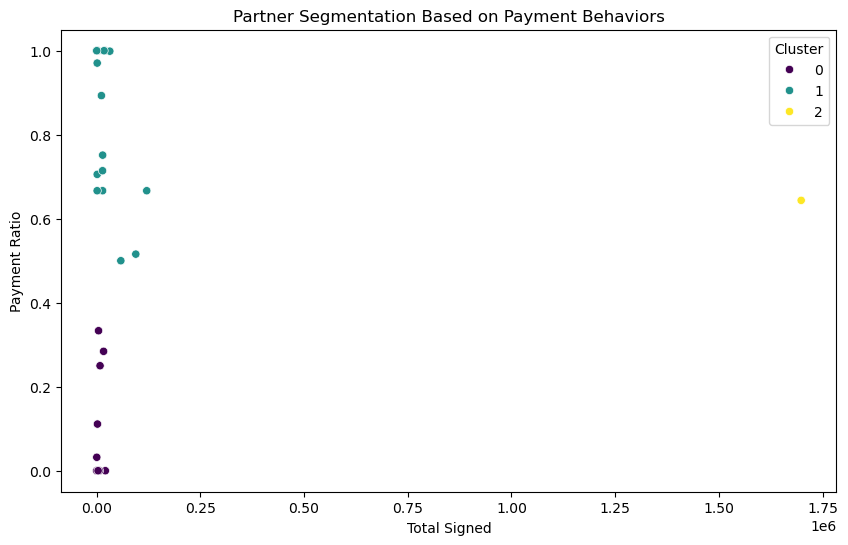

          Partner Name  Total Signed  Signed Amount Paid  Payment Ratio  \
0        ABSHIR Hassan       1643.00                 0.0       0.000000   
1                 AMAL        160.00               160.0       1.000000   
2  AYK Construction co       1800.00              1800.0       1.000000   
3  Ali Mohamed Warsame       5063.76                 0.0       0.000000   
4   Almis Construction      94543.00             74192.0       0.515702   

   Cluster  
0        0  
1        1  
2        1  
3        0  
4        1  


In [6]:

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=partner_data, x='Total Signed', y='Payment Ratio', hue='Cluster', palette='viridis')
plt.title('Partner Segmentation Based on Payment Behaviors')
plt.xlabel('Total Signed')
plt.ylabel('Payment Ratio')
plt.legend(title='Cluster')
plt.show()

# Display the first few rows of the clustered data
print(partner_data.head())


In [7]:
partner_data

,Partner Name,Total Signed,Signed Amount Paid,Payment Ratio,Cluster
0,ABSHIR Hassan,1643.00,0.00,0.000000,0
1,AMAL,160.00,160.00,1.000000,1
2,AYK Construction co,1800.00,1800.00,1.000000,1
3,Ali Mohamed Warsame,5063.76,0.00,0.000000,0
4,Almis Construction,94543.00,74192.00,0.515702,1
5,Berbera Beach Hotel,538.00,0.00,0.000000,0
6,Burco Hotel,1080.00,1080.00,1.000000,1
7,COCC JV GCI,21430.00,21430.00,1.000000,1
8,Customer paying cash,2761.50,2761.50,1.000000,1
9,DHB (Dawlada Hoose ee Berbera),3030.82,3030.82,1.000000,1


In [8]:
Cluster_counts = partner_data['Cluster'].value_counts()
Cluster_counts

Cluster
1    19
0    14
2     1
Name: count, dtype: int64

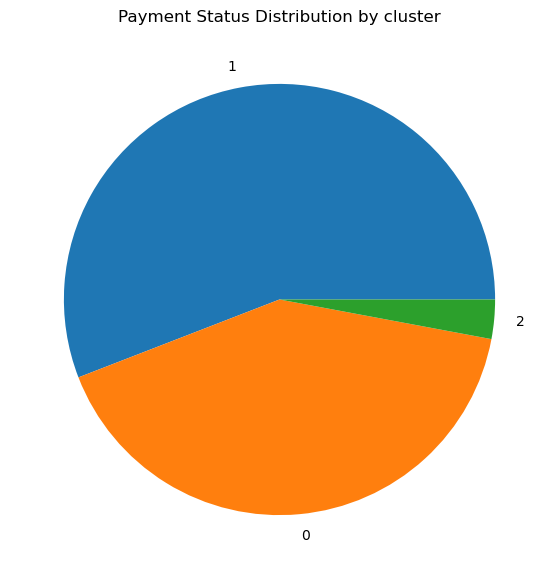

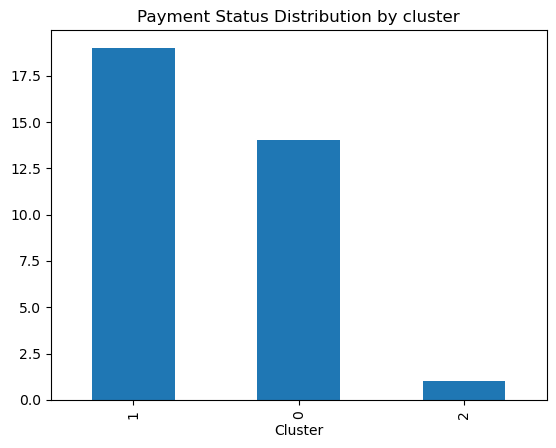

In [9]:
plt.figure(figsize=(10, 7))
plt.pie(Cluster_counts,labels=Cluster_counts.index)
plt.title('Payment Status Distribution by cluster')
plt.show()

Cluster_counts.plot(kind='bar')
plt.title('Payment Status Distribution by cluster')
plt.show()

In [24]:
## Segment partners based on their payment behaviors

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Concrete Cleaned Data.xlsx')
data.head()

,Number,Partner Name,Bill Date,Due Date,Total Signed,Amount Due,Payment Status,Payment Date
0,FAC/2024/00182,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,605.0,605.0,False,May2024
1,FAC/2024/00181,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,1595.0,1595.0,False,May2024
2,FAC/2024/00180,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-09,2024-05-09,1760.0,1760.0,False,May2024
3,FAC/2024/00178,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-08,2024-05-08,770.0,770.0,False,May2024
4,FAC/2024/00177,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-07,2024-05-07,1320.0,1320.0,False,May2024


In [25]:
# Data preprocessing
data['Total Signed'] = pd.to_numeric(data['Total Signed'], errors='coerce')
data['Signed Amount Paid'] = data['Total Signed'] - pd.to_numeric(data['Amount Due'], errors='coerce')
data['Payment Ratio'] = data['Signed Amount Paid'] / data['Total Signed']

In [26]:
# Aggregating data by partner
partner_data2 = data.groupby('Partner Name').agg({
    'Total Signed': 'sum',
    'Signed Amount Paid': 'sum',
    'Payment Ratio': 'mean'
}).reset_index()

In [27]:
# Selecting features for clustering
features = partner_data2[['Total Signed', 'Payment Ratio']]

# Normalizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
partner_data2['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dhimb\anaconda3\envs\CodeAh\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


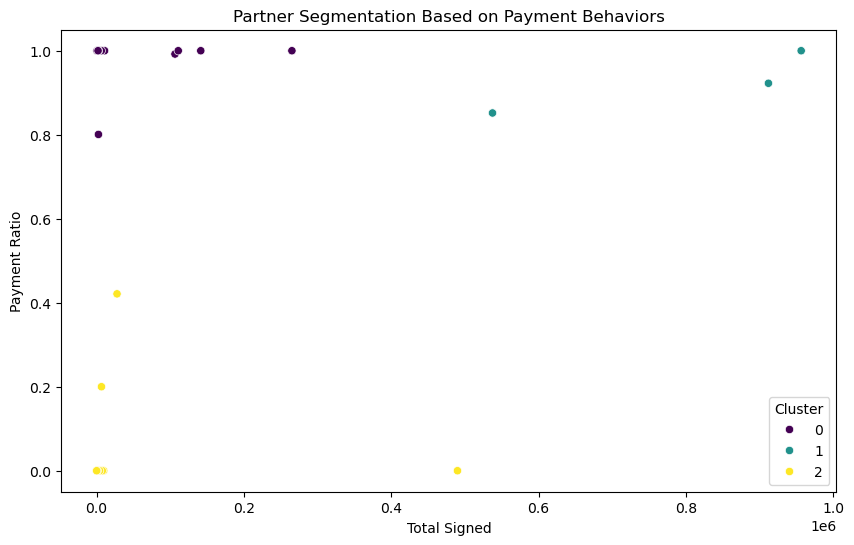

                                   Partner Name  Total Signed  \
0                 ADMORE Capital Management LCC        6735.0   
1                            Abdiqani saleebaan         687.5   
2                       BERBERA HORN DECORATION        9720.0   
3  BIAC (Berbera International Airport Company)        7833.1   
4               CHONGQING CONSTRUCTION. CO.LTD.       27837.0   

   Signed Amount Paid  Payment Ratio  Cluster  
0              1660.0       0.200000        2  
1                 0.0       0.000000        2  
2                 0.0       0.000000        2  
3                 0.0       0.000000        2  
4             12399.0       0.421118        2  


In [30]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=partner_data2, x='Total Signed', y='Payment Ratio', hue='Cluster', palette='viridis')
plt.title('Partner Segmentation Based on Payment Behaviors')
plt.xlabel('Total Signed')
plt.ylabel('Payment Ratio')
plt.legend(title='Cluster')
plt.show()

# Display the first few rows of the clustered data
print(partner_data2.head())

In [31]:
partner_data2

,Partner Name,Total Signed,Signed Amount Paid,Payment Ratio,Cluster
0,ADMORE Capital Management LCC,6735.00,1660.00,0.200000,2
1,Abdiqani saleebaan,687.50,0.00,0.000000,2
2,BERBERA HORN DECORATION,9720.00,0.00,0.000000,2
3,BIAC (Berbera International Airport Company),7833.10,0.00,0.000000,2
4,CHONGQING CONSTRUCTION. CO.LTD.,27837.00,12399.00,0.421118,2
5,Caalin Construction Company,2602.50,2140.00,0.800679,0
6,"DOST Terminals, Adnan Ahmed",1960.00,1960.00,1.000000,0
7,Deeqa Construction and Water Well Drilling,106506.53,101847.00,0.992139,0
8,GORGOR CONSTRUCTION,4180.00,0.00,0.000000,2
9,Kinetic Contracting company,3900.00,3900.00,1.000000,0


In [32]:
partner_data2['Payment Ratio'].value_counts()

Payment Ratio
1.000000    12
0.000000     7
0.200000     1
0.421118     1
0.800679     1
0.992139     1
0.851767     1
0.922496     1
Name: count, dtype: int64